## Realimentación de Estados usando la formula de Ackerman
by: Sergio Andres Castaño Giraldo

https://controlautomaticoeducacion.com/



In [1]:
from scipy import signal
import scipy.linalg as la
import matplotlib.pyplot as plt
import numpy as np

# install control 
# https://python-control.readthedocs.io/en/latest/intro.html
try:
    from control.matlab import *
except:
    !pip install slycot   
    !pip install control
    #conda install -c conda-forge control
    # restart kernel if this doesn't import
    from control.matlab import *
    

Tomando un sistema en la forma FCC:

$\dot{\vec{x}}=\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}\vec{x}+\begin{bmatrix}
1\\
0
\end{bmatrix}u$

In [2]:
# Sistema
A = np.array([[0,1],[1,0]]);
b = np.array([[1],[0]]);
c = np.array([1, 0]);

#Sistema en Espacio de Estados
sys=ss(A,b,c,0);
#sys = signal.StateSpace(A,b,c,0);
#sys = StateSpace(A,b,c,0);

#Controlabilidad
Co = ctrb(A,b)
#Rango de la matriz de controlabilidad
print(np.linalg.matrix_rank(Co))

2


Definimos una ecuación característica deseada

$\Delta_f(\lambda)=\lambda^2+7\lambda+3$

In [26]:
Ps= np.array([1, 7, 3]);
Ed=np.roots(Ps)
print(Ps)

[1 7 3]


In [57]:
# Ganancia k
phi=0;
n=len(A);

for i in range(2,-1,-1):
    phi = phi + Ps[n-i]*np.linalg.matrix_power(A,i);

k_bar=np.zeros((1,n));
k_bar[...,n-1]=1;

#Inversa de Co
iCo = la.inv(Co);

#Ganancia de realimentación de estados
k1 = k_bar@iCo@phi
print('Ganancia de Realimentacion de Estados: ',k1)

Ganancia de Realimentacion de Estados:  [[7. 4.]]


In [58]:
# Python Control Systems Library
k2 = acker(A,b,Ed)
print('Ganancia de Realimentacion de Estados: ',k2)

Ganancia de Realimentacion de Estados:  [[7. 4.]]


# Lazo Cerrado

In [59]:
Af=A-b*k1
Ef = la.eig(Af);
print(Ef[0])

[-6.54138127+0.j -0.45861873+0.j]


In [60]:
#Condicion inicial
x0=[1, 1];
#Sistema con realimentación en espacio de estados
slc=ss(Af,b,c,0);

Text(0, 0.5, 'Lazo Cerrado (CI)')

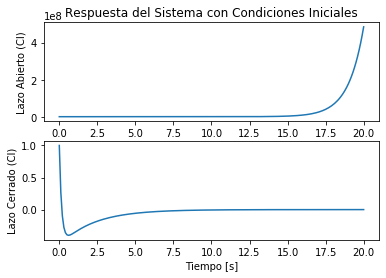

In [61]:
#Respuesta del sistema
ts = linspace(0,20,200);
yi, t = initial(sys, ts, x0)
plt.figure(1)
plt.subplot(211)
plt.plot(t,yi)
plt.title('Respuesta del Sistema con Condiciones Iniciales');
plt.xlabel('Tiempo [s]')
plt.ylabel('Lazo Abierto (CI)')

yi, t = initial(slc, ts, x0)
plt.subplot(212)
plt.plot(t,yi)
plt.xlabel('Tiempo [s]')
plt.ylabel('Lazo Cerrado (CI)')